<a href="https://colab.research.google.com/github/ghazalna/Pathrise-Analytics-Insights/blob/main/Pathrise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict the salary of data related positions based on location, company review and job title by using Linear Regression

# **Import dataset**

In [207]:
from google.colab import files

In [208]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise (5).xlsx


# **Read the data**

In [209]:
import pandas as pd

In [210]:
df = pd.read_excel('Data_Pathrise.xlsx')

In [211]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


# **Data Understanding**

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [108]:
# Display the first few rows of the dataset
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [109]:
# Summary statistics for numerical columns
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [110]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

In [111]:
# Check for missing values
df.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [112]:
# Check for unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

pathrise_status: ['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA']
primary_track: ['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing']
cohort_tag: ['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan]
employment_status : ['Unemployed' 'Employed Part-Time' 'Contractor' 'Employed Full-Time'
 'Student' nan]
highest_level_of_education: ["Bachelor's Degree" 'Some College, No Degree' "Master's Degree" nan
 'Doctorate or Professional Degree' 'High School Graduate'
 'GED or equivalent' 'Some High School']
length_of_job_search: ['3-5 months' 'Less than one month' '

The main goal is to predict if a fellow will ultimately be placed at a company, I can framed this as a binary classification problem. I created a binary target variable where 'Placed' is considered as the positive class (1) and all other statuses are considered as the negative class (0). This means I am predicting whether a fellow will be placed ('Placed') or not.

In [113]:
# Create a binary target variable
df['pathrise_status'] = df['pathrise_status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Check the distribution of the target variable
print(df['pathrise_status'].value_counts())


0    1588
1     956
Name: pathrise_status, dtype: int64


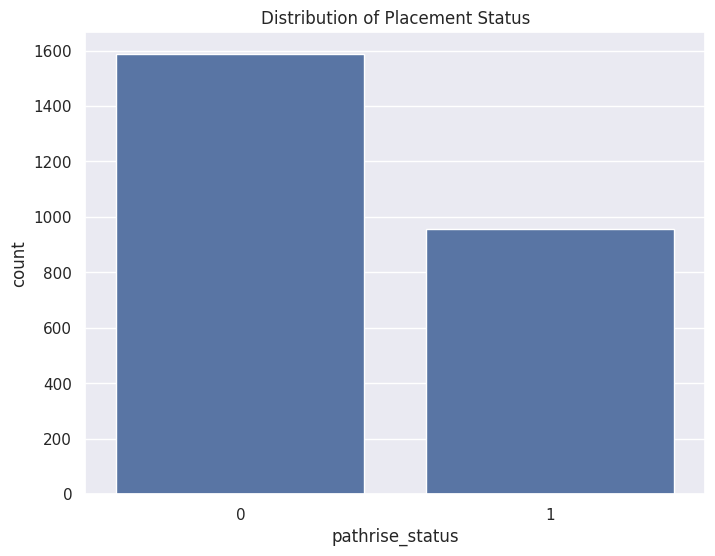

In [114]:
# Visualize the distribution of key variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='pathrise_status', data=df)
plt.title('Distribution of Placement Status')
plt.show()

# **2. Data Cleaning and Preprocessing:**

In [115]:
# Check for missing values
df.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [116]:
# Mapping categories
education_mapping = {
    "Bachelor's Degree": "Undergraduate",
    "Master's Degree": "Graduate",
    "Some College, No Degree": "Undergraduate",
    "Doctorate or Professional Degree": "Postgraduate",
    "High School Graduate": "Diploma",
    "Some High School": "Diploma",
    "GED or equivalent": "Diploma"
}

# Replace values in the 'highest_level_of_education' column
df['highest_level_of_education'] = df['highest_level_of_education'].replace(education_mapping)

# Verify the changes
print(df['highest_level_of_education'].value_counts())

Undergraduate    1496
Graduate          810
Postgraduate      135
Diploma            45
Name: highest_level_of_education, dtype: int64


In [117]:
# Fill missing values for categorical columns with the mode
df['cohort_tag'].fillna(df['cohort_tag'].mode()[0], inplace=True)
df['employment_status '].fillna(df['employment_status '].mode()[0], inplace=True)
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0], inplace=True)
df['length_of_job_search'].fillna(df['length_of_job_search'].mode()[0], inplace=True)
df['biggest_challenge_in_search'].fillna(df['biggest_challenge_in_search'].mode()[0], inplace=True)
df['professional_experience'].fillna(df['professional_experience'].mode()[0], inplace=True)
df['work_authorization_status'].fillna(df['work_authorization_status'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['race'].fillna(df['race'].mode()[0], inplace=True)

# Fill missing values for numerical columns with the mean or median
df['program_duration_days'].fillna(df['program_duration_days'].median(), inplace=True)
df['number_of_interviews'].fillna(df['number_of_interviews'].median(), inplace=True)


In [118]:
# Check for missing values
df.isnull().sum()

id                             0
pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

In [119]:
# Mapping categories
category_mapping = {
    'Hearing back on my applications': 'Application Process',
    'Getting past final round interviews': 'Interview Process',
    'Technical interviewing': 'Interview Process',
    'Lack of relevant experience': 'Experience Gap',
    'Getting past mid-stage interviews': 'Interview Process',
    'Figuring out which jobs to apply for': 'Job Selection',
    'Getting past phone screens': 'Interview Process',
    'Behavioral interviewing': 'Interview Process',
    'Resume gap': 'Experience Gap',
    'Technical skills': 'Skill Gap'
}

# Create broader categories
df['biggest_challenge_in_search'] = df['biggest_challenge_in_search'].replace(category_mapping)



In [120]:
df['biggest_challenge_in_search'].value_counts()

Interview Process      1032
Application Process    1026
Experience Gap          264
Job Selection           186
Skill Gap                36
Name: biggest_challenge_in_search, dtype: int64

In [121]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,0,SWE,OCT19A,112.0,0,Unemployed,Undergraduate,3-5 months,Application Process,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,0,PSO,JAN20A,112.0,0,Unemployed,Undergraduate,3-5 months,Interview Process,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,0,Design,AUG19B,0.0,0,Employed Part-Time,Graduate,Less than one month,Job Selection,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,0,PSO,AUG19B,0.0,0,Contractor,Undergraduate,Less than one month,Interview Process,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,1,SWE,AUG19A,89.0,1,Unemployed,Undergraduate,1-2 months,Application Process,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,0,Design,JUN18A,457.0,0,Contractor,Graduate,6 months to a year,Interview Process,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,0,Data,JAN19B,488.0,0,Student,Graduate,3-5 months,Application Process,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,0,SWE,SEP18C,112.0,0,Contractor,Undergraduate,Less than one month,Interview Process,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,0,SWE,MAY18A,112.0,0,Student,Graduate,Less than one month,Interview Process,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [122]:
df.dtypes

id                               int64
pathrise_status                  int64
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

In [123]:
df.to_csv('df_cleaned.csv', index=False)

# **3. Exploratory Data Analysis (EDA):**

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Display summary statistics for numerical columns
numeric_summary = df.describe()
print(numeric_summary)

                id  pathrise_status  program_duration_days       placed  \
count  2544.000000      2544.000000            2544.000000  2544.000000   
mean   1272.500000         0.375786             130.263365     0.375786   
std     734.533866         0.484420             110.046534     0.484420   
min       1.000000         0.000000               0.000000     0.000000   
25%     636.750000         0.000000              40.000000     0.000000   
50%    1272.500000         0.000000             112.000000     0.000000   
75%    1908.250000         1.000000             184.000000     1.000000   
max    2544.000000         1.000000             548.000000     1.000000   

       number_of_interviews  number_of_applications  
count           2544.000000             2544.000000  
mean               2.080975               36.500786  
std                2.848882               53.654896  
min                0.000000                0.000000  
25%                0.000000                9.000000  


<ipython-input-127-faa28f7edad0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='placed', data=df, palette='viridis')


Text(0.5, 1.0, 'Placement Distribution (Countplot)')

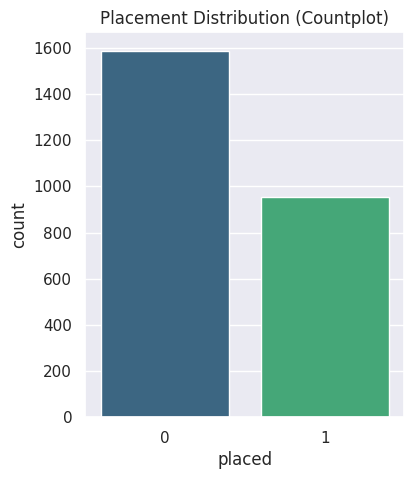

In [127]:
# Visualize the distribution of 'placed' (Task 1) using different plots
plt.figure(figsize=(14, 5))

# Countplot
plt.subplot(1, 3, 1)
sns.countplot(x='placed', data=df, palette='viridis')
plt.title('Placement Distribution (Countplot)')

Text(0.5, 1.0, 'Placement Distribution (Pie Chart)')

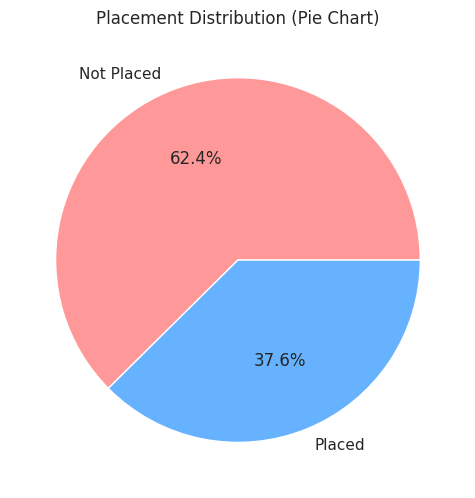

In [148]:
# Pie chart
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 2)
plt.pie(df['placed'].value_counts(), labels=['Not Placed', 'Placed'], autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Placement Distribution (Pie Chart)')

<ipython-input-146-afa02de6bc4d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='program_duration_days', data=df, palette='pastel')


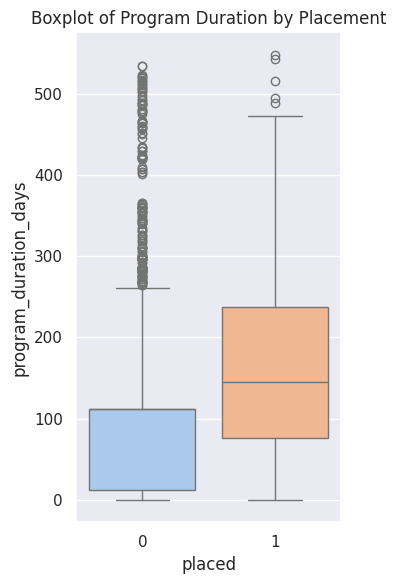

In [146]:
# Boxplot of 'program_duration_days' by 'placed'
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 3)
sns.boxplot(x='placed', y='program_duration_days', data=df, palette='pastel')
plt.title('Boxplot of Program Duration by Placement')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Program Duration (Histogram)')

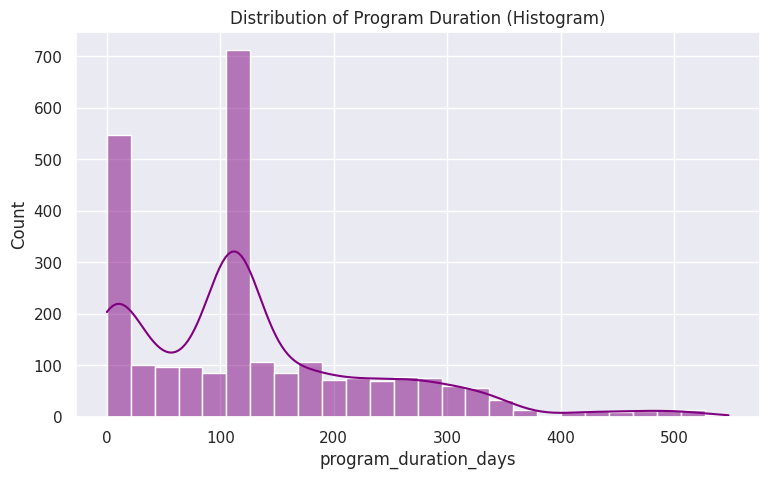

In [140]:
# Visualize the distribution of 'program_duration_days' (Task 2) using different plots
plt.figure(figsize=(30, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(x='program_duration_days', data=df, kde=True, color='purple')
plt.title('Distribution of Program Duration (Histogram)')

<ipython-input-136-e1b76df5573f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='program_duration_days', data=df, palette='muted')


Text(0.5, 1.0, 'Distribution of Program Duration (Violin Plot)')

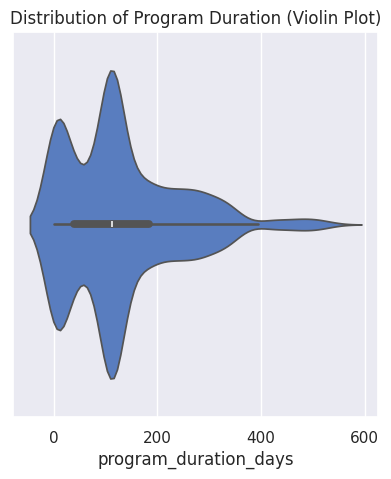

In [136]:
# Violin plot
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 2)
sns.violinplot(x='program_duration_days', data=df, palette='muted')
plt.title('Distribution of Program Duration (Violin Plot)')

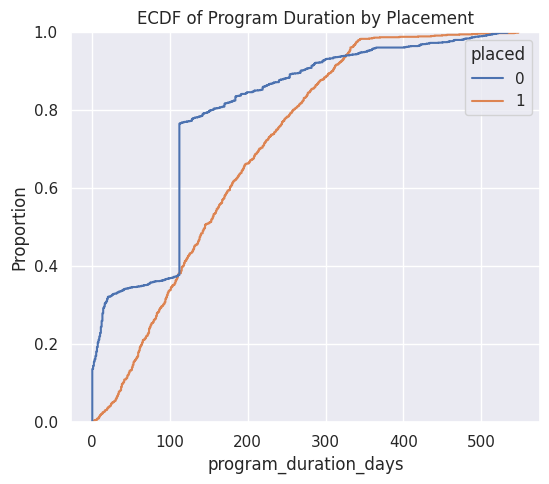

In [135]:

# ECDF (Empirical Cumulative Distribution Function)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 3)
sns.ecdfplot(data=df, x='program_duration_days', hue='placed')
plt.title('ECDF of Program Duration by Placement')

plt.tight_layout()
plt.show()

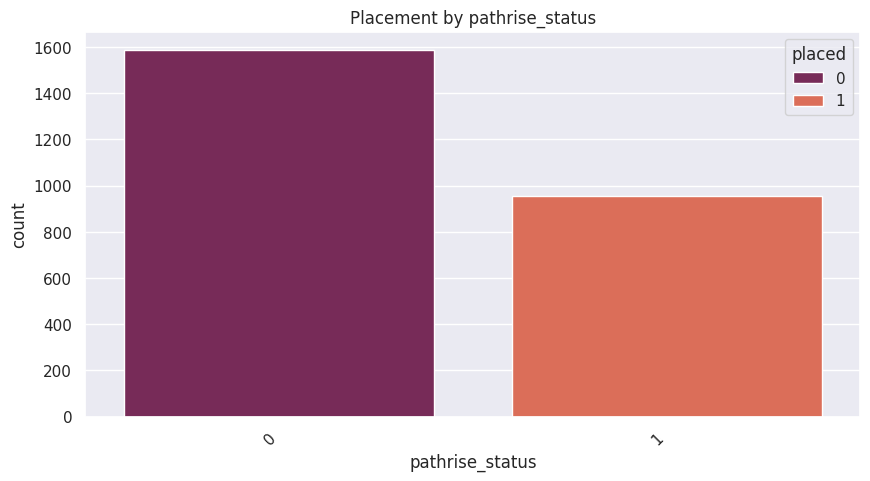

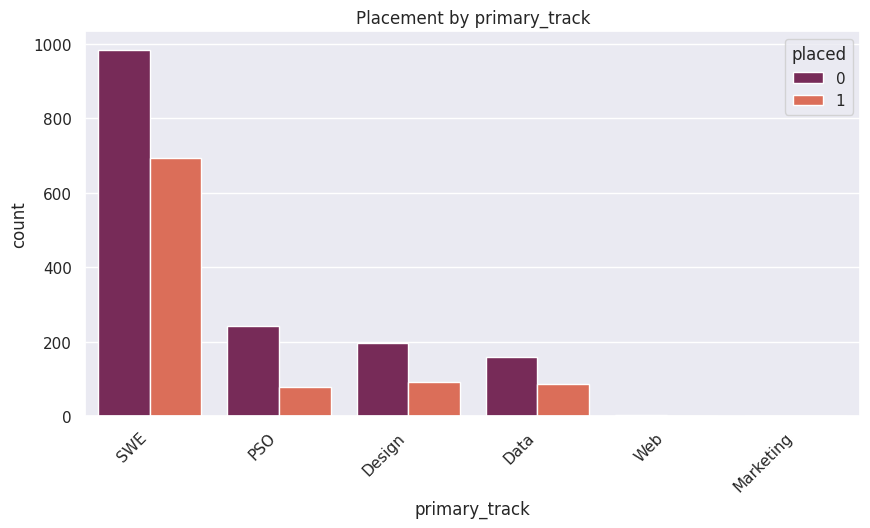

Column 'employment_status' not found in the DataFrame.


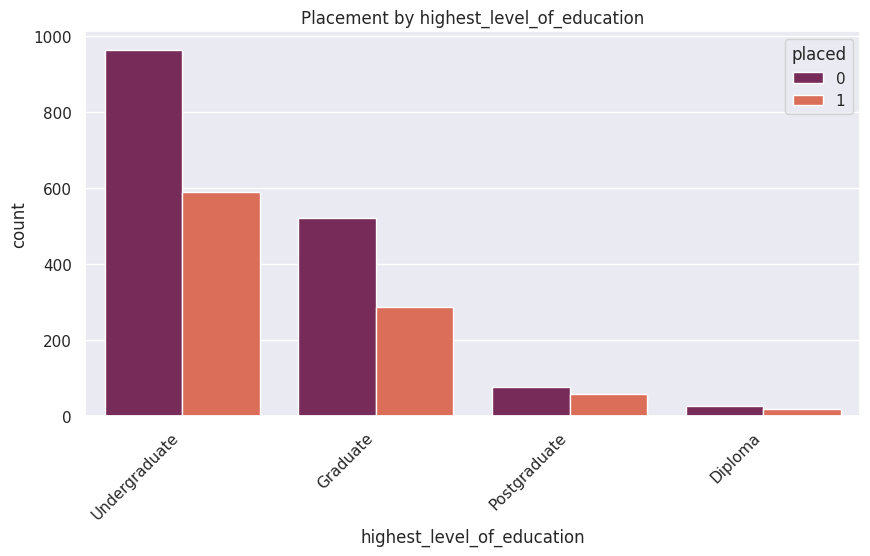

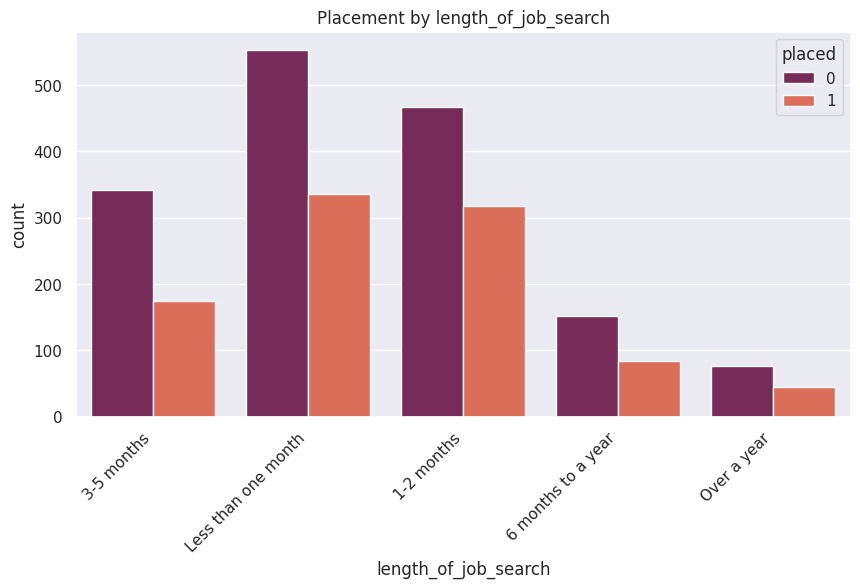

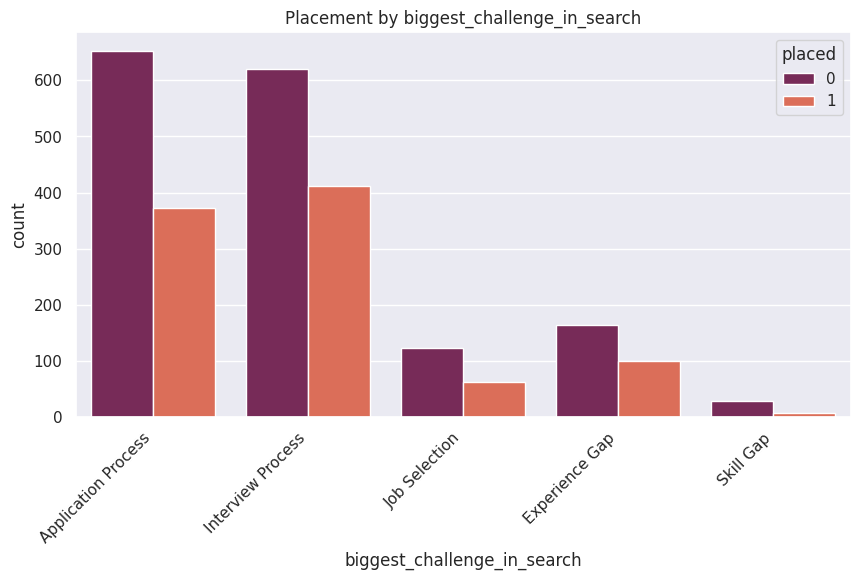

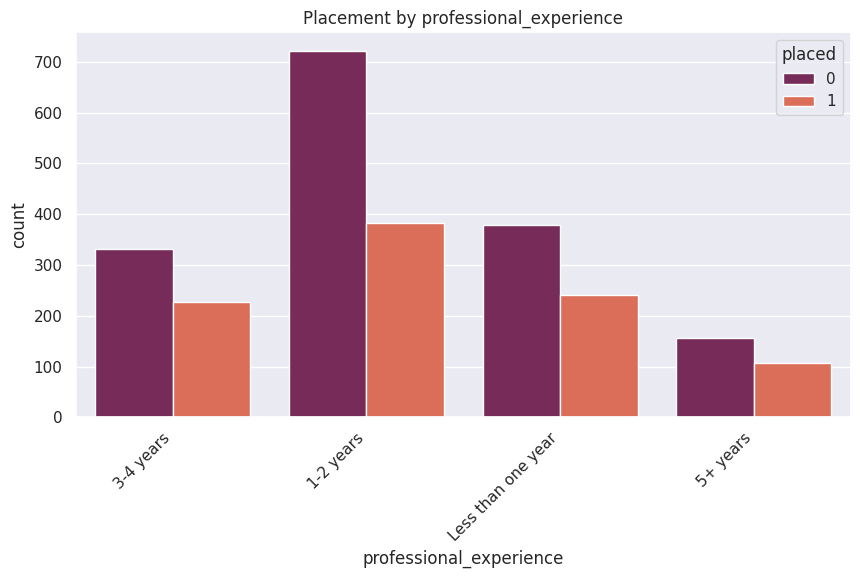

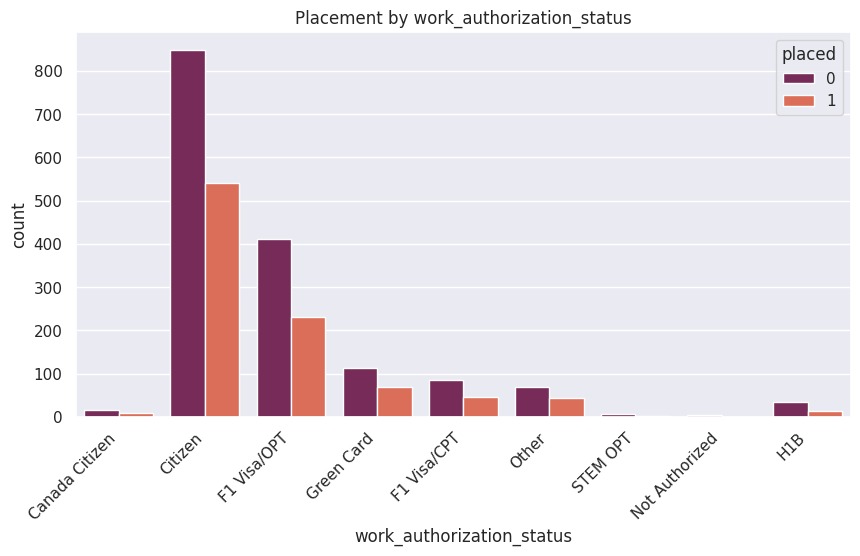

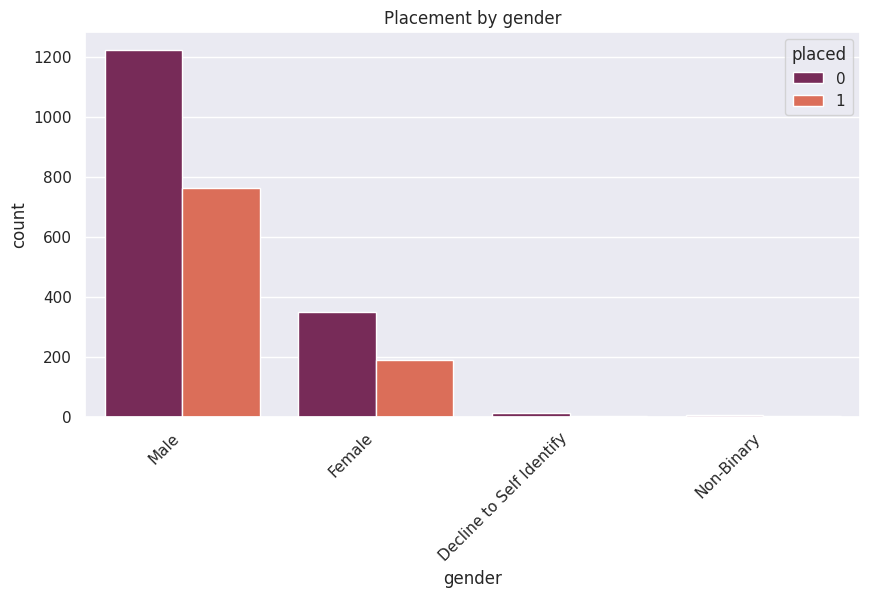

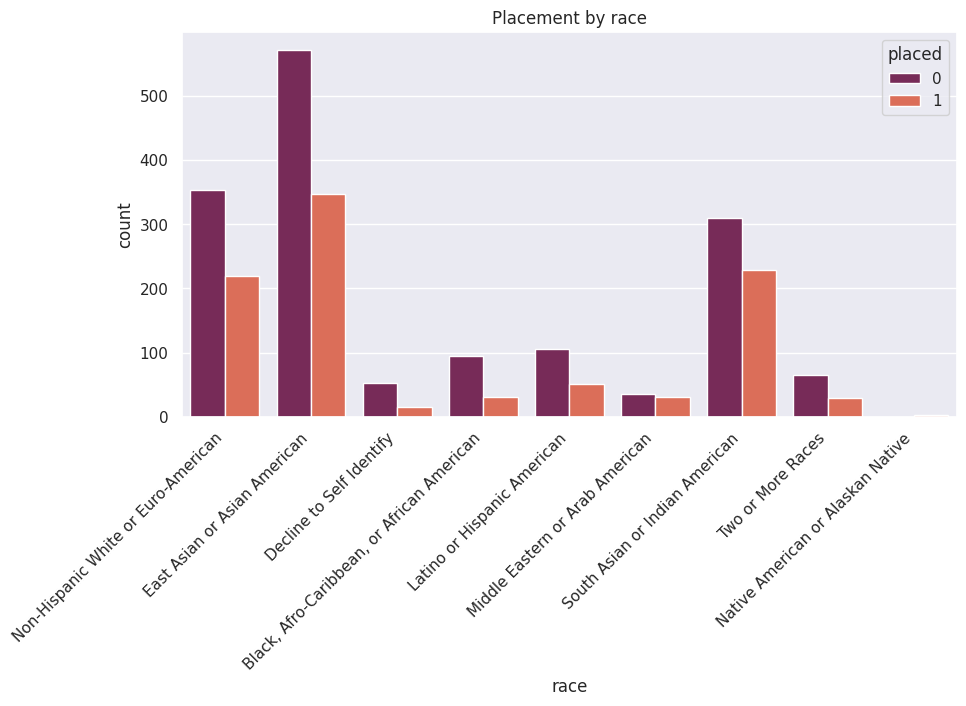

In [134]:
# Additional visualizations for categorical features
categorical_features = ['pathrise_status', 'primary_track', 'employment_status', 'highest_level_of_education',
                         'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience',
                         'work_authorization_status', 'gender', 'race']

for feature in categorical_features:
    if feature in df.columns:  # Check if the column exists in the DataFrame
        plt.figure(figsize=(10, 5))
        sns.countplot(x=feature, hue='placed', data=df, palette='rocket')
        plt.title(f'Placement by {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame.")


# **4. Feature Engineering:**

In [149]:

# Select categorical columns for one-hot encoding
nominal_columns = ['primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education',
                   'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience',
                   'work_authorization_status', 'gender', 'race']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)


In [150]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'program_duration_days' and 'number_of_interviews' are numerical columns to be normalized
numerical_columns = ['program_duration_days', 'number_of_interviews']

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [151]:
df

,id,pathrise_status,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,...,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,1,0,0.204380,0,0.10,900,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,2,0,0.204380,0,0.30,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,0,0.000000,0,0.00,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,4,0,0.000000,0,0.25,25,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,5,1,0.162409,1,0.50,100,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,0,0.833942,0,0.20,15,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2540,2541,0,0.890511,0,0.05,7,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2541,2542,0,0.204380,0,0.05,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2542,2543,0,0.204380,0,0.10,10,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [152]:
df.to_csv('df_Featured.csv', index=False)

# **5. Split Data into Training and Testing Sets:**

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Task 1: Predicting placement (binary classification)
features_task1 = df.drop('placed', axis=1)
target_task1 = df['placed']
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(features_task1, target_task1, test_size=0.2, random_state=42, stratify=target_task1)

# Task 2: Predicting duration until placement (regression)
features_task2 = df.drop('program_duration_days', axis=1)
target_task2 = df['program_duration_days']
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(features_task2, target_task2, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets for each task
print("Task 1:")
print("X_train_task1 shape:", X_train_task1.shape)
print("X_test_task1 shape:", X_test_task1.shape)
print("y_train_task1 shape:", y_train_task1.shape)
print("y_test_task1 shape:", y_test_task1.shape)

print("Task 2:")
print("X_train_task2 shape:", X_train_task2.shape)
print("X_test_task2 shape:", X_test_task2.shape)
print("y_train_task2 shape:", y_train_task2.shape)
print("y_test_task2 shape:", y_test_task2.shape)



Task 1:
X_train_task1 shape: (2035, 93)
X_test_task1 shape: (509, 93)
y_train_task1 shape: (2035,)
y_test_task1 shape: (509,)
Task 2:
X_train_task2 shape: (2035, 93)
X_test_task2 shape: (509, 93)
y_train_task2 shape: (2035,)
y_test_task2 shape: (509,)


# **6. Model Selection:**

Given that the task involves predicting whether a fellow will be placed and estimating the time to placement, you might need two models:
Classification Model: To predict placement (e.g., logistic regression, decision tree, random forest).
Regression Model: To predict the time to placement (e.g., linear regression, decision tree regressor).

## **LogisticRegression**

In [164]:
# Task1:derive insights around if a fellow will ultimately be placed at a company or not ( yes or no )

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [168]:
# Task 1: Classification - Logistic Regression
model_task1 = make_pipeline(StandardScaler(), LogisticRegression())


# X_train_task1, X_test_task1, y_train_task1, y_test_task1 are already defined
# Train the model
model_task1.fit(X_train_task1, y_train_task1)

# Make predictions
y_pred_task1 = model_task1.predict(X_test_task1)


In [172]:
# Evaluate the model
accuracy_score(y_test_task1, y_pred_task1)

1.0

In [173]:
accuracy_score(y_test_task1, y_pred_task1, normalize=False)

509

In [187]:

# Fit and predict using the logistic regression model
logreg_model.fit(X_train_task1, y_train_task1)
y_pred_logreg = logreg_model.predict(X_test_task1)

# Evaluate using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_task1, y_pred_logreg))

print("Confusion Matrix:")
print(confusion_matrix(y_test_task1, y_pred_logreg))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       191

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509

Confusion Matrix:
[[318   0]
 [  0 191]]


## **Random Forest**

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_task1, y_pred_task1_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 1.0000


In [179]:
# Check the distribution of the target variable in the training set
print("Training set distribution:")
print(y_train_task1.value_counts())

# Check the distribution of the target variable in the testing set
print("Testing set distribution:")
print(y_test_task1.value_counts())


Training set distribution:
0    1270
1     765
Name: placed, dtype: int64
Testing set distribution:
0    318
1    191
Name: placed, dtype: int64


In [181]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test_task1, y_pred_task1_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_test_task1, y_pred_task1_rf)
print("Classification Report:")
print(class_report_rf)


Confusion Matrix:
[[318   0]
 [  0 191]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       191

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



## **SVM**

In [188]:
from sklearn.svm import SVC

# Create the model
model_svm = SVC(random_state=42)

# Train the model
model_svm.fit(X_train_task1, y_train_task1)

# Make predictions
y_pred_svm = model_svm.predict(X_test_task1)


In [189]:
# Evaluate the SVM
accuracy_SVM = accuracy_score(y_test_task1, y_pred_svm)
print(f"SVM Accuracy: {accuracy_rf:.4f}")

SVM Accuracy: 1.0000


## **Gradient Boosting**

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model
model_gb.fit(X_train_task1, y_train_task1)

# Make predictions
y_pred_gb = model_gb.predict(X_test_task1)


In [192]:
# Evaluate the Gradient Boosting
accuracy_GradientBoosting = accuracy_score(y_test_task1, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_rf:.4f}")

Gradient Boosting Accuracy: 1.0000


## **K-Nearest Neighbors (KNN)**

In [193]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(X_train_task1, y_train_task1)

# Make predictions
y_pred_knn = model_knn.predict(X_test_task1)


In [194]:
# Evaluate the Gradient Boosting
accuracy_knn = accuracy_score(y_test_task1, y_pred_knn)
print(f"knn Accuracy: {accuracy_rf:.4f}")

knn Accuracy: 1.0000


# **7. Model Training:**

**LinearRegression**

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the model
model_linear_reg = LinearRegression()

# Train the model
model_linear_reg.fit(X_train_task2, y_train_task2)

# Make predictions
y_pred_linear_reg = model_linear_reg.predict(X_test_task2)

# Evaluate the model
mse = mean_squared_error(y_test_task2, y_pred_linear_reg)
mae = mean_absolute_error(y_test_task2, y_pred_linear_reg)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.03829011109076007
Mean Absolute Error: 0.14996848024115692


In [199]:
import seaborn as sns

<ipython-input-202-2bc50deebfd1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins=50)


<Axes: xlabel='program_duration_days', ylabel='Density'>

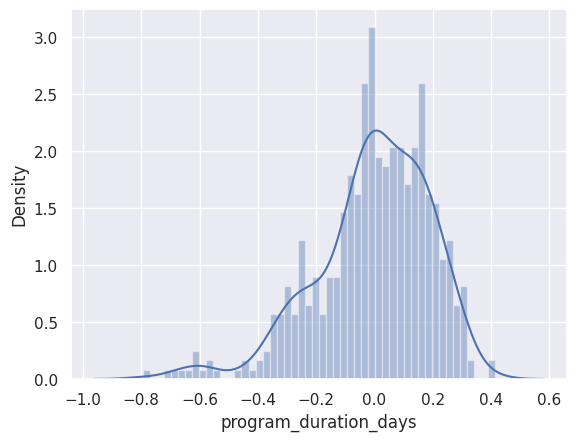

In [202]:
residual = y_pred_linear_reg - y_test_task2
sns.distplot(residual, bins=50)


In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define hyperparameters to tune
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_task2, y_train_task2)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred_task2 = grid_search.predict(X_test_task2)


Best Parameters: {'regressor__fit_intercept': False}


In [203]:
df

,id,pathrise_status,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,...,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,1,0,0.204380,0,0.10,900,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,2,0,0.204380,0,0.30,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,0,0.000000,0,0.00,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,4,0,0.000000,0,0.25,25,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,5,1,0.162409,1,0.50,100,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,0,0.833942,0,0.20,15,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2540,2541,0,0.890511,0,0.05,7,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2541,2542,0,0.204380,0,0.05,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2542,2543,0,0.204380,0,0.10,10,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [206]:
my_sample = {'pathrise_status':1 ,'primary_track' : SWE, 'cohort_tag':	OCT19A	,'professional_experience':Unemployed	,'highest_level_of_education' :Undergraduate , 'gender':Male}

NameError: name 'SWE' is not defined

# **8. Model Evaluation:**

Evaluate the models on the testing dataset using appropriate metrics.
For the classification model, consider metrics like accuracy, precision, recall, and F1-score.
For the regression model, consider metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).


# **9. Interpretation of Results:**

# **10. Recommendations:**

# **11. Documentation and Communication:**

# **12. Iterate**